# Air Quality Forecasts

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import cdsapi
from platform import python_version
print("python version: %s"%python_version())
print("pandas version: %s"%pd.__version__)
print("xarray version: %s"%xr.__version__)

python version: 3.8.2
pandas version: 1.0.2
xarray version: 0.14.0


In [6]:
#URL = "https://ads.atmosphere.copernicus.eu/api/v2"
#KEY = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
#c = cdsapi.Client(url=URL, key=KEY)

c = cdsapi.Client()

c.retrieve(
    'cams-europe-air-quality-forecasts',
    {
        'model': 'ensemble',
        'date': '2020-11-01/2020-11-20',
        'format': 'netcdf',
        'variable': [
            'ammonia', 'nitrogen_dioxide', 'pm2.5_anthropogenic_fossil_fuel_carbon',
        ],
        'level': [
            '0', '250', '50',
            '500',
        ],
        'type': 'forecast',
        'time': '00:00',
        'leadtime_hour': [
            '24', '48', '72',
        ],
        'area': [
            47.12, 6.57, 36.4,
            18.52,
        ],
    },
    'data/air_quality_forecasts_europe_2020_november.zip')

2020-11-20 19:09:27,171 INFO Welcome to the CDS
2020-11-20 19:09:27,172 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-europe-air-quality-forecasts
2020-11-20 19:09:27,258 INFO Request is queued
2020-11-20 19:09:28,347 INFO Request is running
2020-11-20 19:12:19,715 INFO Request is completed
2020-11-20 19:12:19,717 INFO Downloading http://136.156.133.82/cache-compute-0003/cache/data4/adaptor.cams_regional_fc.retrieve-1605892284.4057841-31857-1-100949fc-e619-4244-842d-1447ef38843e.zip to air_quality_forecasts_europe_2020_november.zip (35M)
2020-11-20 19:13:03,447 INFO Download rate 820.2K/s 


Result(content_length=36727062,content_type=application/zip,location=http://136.156.133.82/cache-compute-0003/cache/data4/adaptor.cams_regional_fc.retrieve-1605892284.4057841-31857-1-100949fc-e619-4244-842d-1447ef38843e.zip)

In [7]:
import zipfile
with zipfile.ZipFile('data/air_quality_forecasts_europe_2020_november.zip', 'r') as zip_ref:
    zip_ref.extractall('data/aq_forecasts')

In [8]:
!ls data/aq_forecasts

ENS_FORECAST_2020-11-01.nc
ENS_FORECAST_2020-11-02.nc
ENS_FORECAST_2020-11-03.nc
ENS_FORECAST_2020-11-04.nc
ENS_FORECAST_2020-11-05.nc
ENS_FORECAST_2020-11-06.nc
ENS_FORECAST_2020-11-07.nc
ENS_FORECAST_2020-11-08.nc
ENS_FORECAST_2020-11-09.nc
ENS_FORECAST_2020-11-10.nc
ENS_FORECAST_2020-11-11.nc
ENS_FORECAST_2020-11-12.nc
ENS_FORECAST_2020-11-13.nc
ENS_FORECAST_2020-11-14.nc
ENS_FORECAST_2020-11-15.nc
ENS_FORECAST_2020-11-16.nc
ENS_FORECAST_2020-11-17.nc
ENS_FORECAST_2020-11-18.nc
ENS_FORECAST_2020-11-19.nc
ENS_FORECAST_2020-11-20.nc


In [9]:
forecast1_ds = xr.open_dataset('data/aq_forecasts/ENS_FORECAST_2020-11-01.nc')
forecast1_ds

<xarray.Dataset>
Dimensions:    (latitude: 107, level: 4, longitude: 119, time: 3)
Coordinates:
  * longitude  (longitude) float32 6.65 6.75 6.85 6.95 ... 18.25 18.35 18.45
  * latitude   (latitude) float32 47.05 46.95 46.85 46.75 ... 36.65 36.55 36.45
  * level      (level) float32 0.0 50.0 250.0 500.0
  * time       (time) timedelta64[ns] 1 days 2 days 3 days
Data variables:
    ecff_conc  (time, level, latitude, longitude) float32 ...
    nh3_conc   (time, level, latitude, longitude) float32 ...
    no2_conc   (time, level, latitude, longitude) float32 ...
Attributes:
    title:        ECFF/NH3/NO2 Air Pollutant FORECAST at 4 levels
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20201101+[24H_72H]
    summary:      ENSEMBLE model hourly FORECAST of ECFF/NH3/NO2 concentratio...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

In [10]:
no2_f1 = forecast1_ds['no2_conc']
no2_f1

<xarray.DataArray 'no2_conc' (time: 3, level: 4, latitude: 107, longitude: 119)>
[152796 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 6.65 6.75 6.85 6.95 ... 18.25 18.35 18.45
  * latitude   (latitude) float32 47.05 46.95 46.85 46.75 ... 36.65 36.55 36.45
  * level      (level) float32 0.0 50.0 250.0 500.0
  * time       (time) timedelta64[ns] 1 days 2 days 3 days
Attributes:
    species:        Nitrogen Dioxide
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_nitrogen_dioxide_in_air

In [12]:
no2_f1_lev1 = no2_f1[:,:,0,:] # filter level 0.0

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
print("matplotlib version: %s"%matplotlib.__version__)
print("cartopy version: %s"%cartopy.__version__)

matplotlib version: 3.3.1
cartopy version: 0.18.0


Text(0.5, 1.0, 'Air Quality Forecast - 2020-11-01T00:00:00')

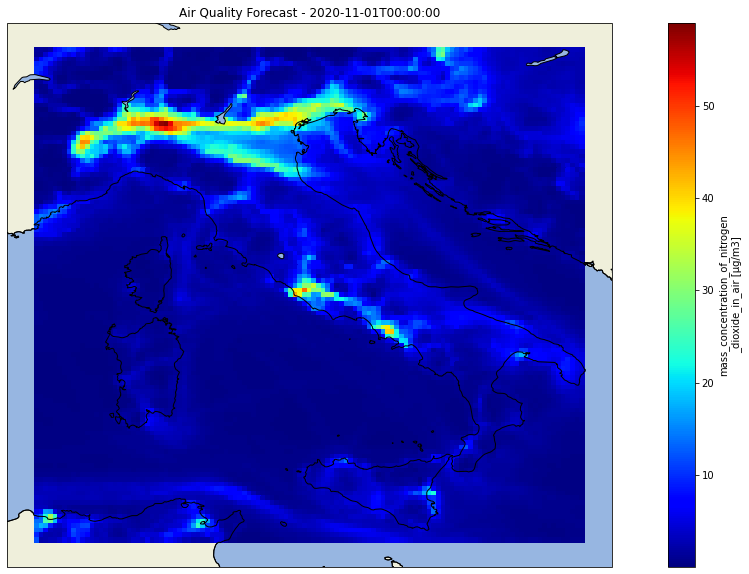

In [14]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.coastlines()
no2_f1.sel(level = 0.0, time='86400000000000').plot.pcolormesh(ax=ax, x='longitude', y='latitude', add_colorbar=True, cmap='jet')
plt.title('Air Quality Forecast - 2020-11-01T00:00:00')